In [2]:
import matplotlib.pyplot as plt
import numpy as np

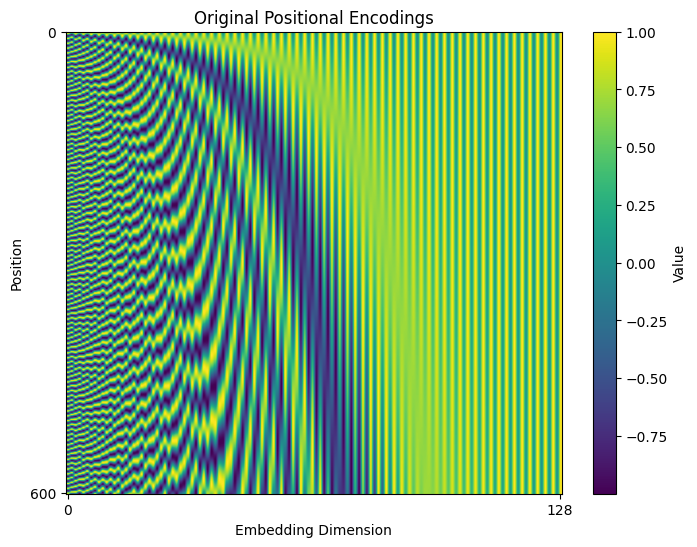

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  7.61720408e-01 ...  9.99999991e-01
   1.15478198e-04  9.99999993e-01]
 [ 9.09297427e-01 -4.16146837e-01  9.87046251e-01 ...  9.99999964e-01
   2.30956395e-04  9.99999973e-01]
 ...
 [ 9.72419091e-02  9.95260775e-01  9.82247134e-01 ...  9.96832699e-01
   6.88858875e-02  9.97624546e-01]
 [ 8.90023093e-01  4.55915447e-01  4.93511419e-01 ...  9.96822085e-01
   6.90010909e-02  9.97616584e-01]
 [ 8.64521149e-01 -5.02596441e-01 -3.42749242e-01 ...  9.96811454e-01
   6.91162934e-02  9.97608610e-01]]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to generate positional encodings
def positional_encoding(max_position, d_model):
    PE = np.zeros((max_position, d_model))
    for pos in range(max_position):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** (i / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** (i / d_model)))
    return PE

# Define parameters
max_position = 600  # Number of positions
d_model = 128       # Embedding dimension

# Compute positional encodings
PE = positional_encoding(max_position, d_model)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(PE, aspect='auto', cmap='viridis')
plt.colorbar(label="Value")

# Labels and title
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.title("Original Positional Encodings")

# Annotate axes
plt.xticks([0, d_model-1], [0, d_model])
plt.yticks([0, max_position-1], [0, max_position])



plt.show()
print(PE)

<Axes: >

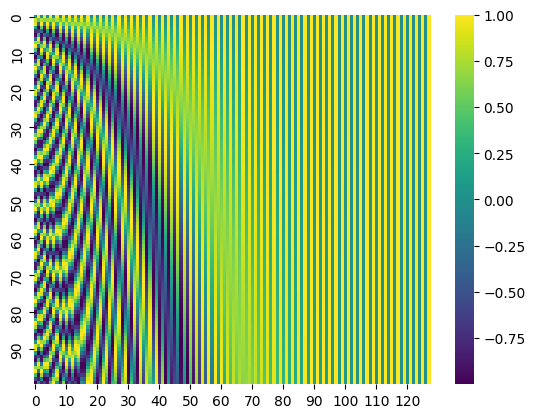

In [13]:
import seaborn as sns
sns.heatmap(PE, cmap='viridis', cbar=True, xticklabels=10, yticklabels=10)

In [15]:
with open('positional_encoding.txt', 'w') as f:
    for i in range(max_position):
        f.write(f"{i}: {PE[i]}\n")

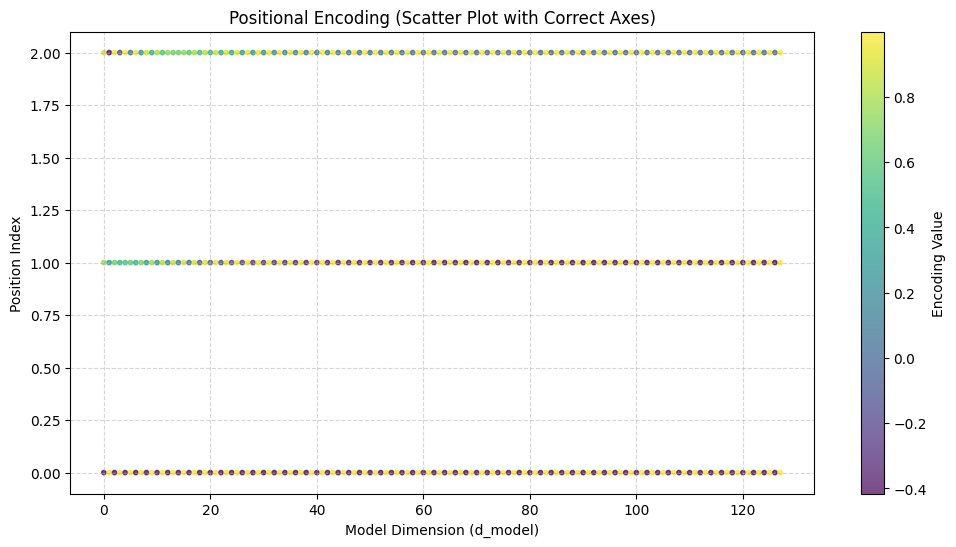

In [23]:
plt.figure(figsize=(12, 6))

# Create scatter points where x = dimension, y = position, and color = PE value
for pos in range(3):
    plt.scatter(np.arange(d_model), [pos] * d_model, c=PE[pos, :], cmap="viridis", s=10, alpha=0.7)

# Axis labels and title
plt.xlabel("Model Dimension (d_model)")
plt.ylabel("Position Index")
plt.title("Positional Encoding (Scatter Plot with Correct Axes)")
plt.colorbar(label="Encoding Value")  # Add color bar for value reference
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()